First 5 rows of the dataset:


,Order ID,Sales,Profit,Region,Product Category,Date,Discount
0,OID2,110.5,23.5,West,Technology,02-01-2025,0.05
1,OID3,121.0,27.0,South,Office Supplies,03-01-2025,0.07
2,OID4,131.5,30.5,North,Furniture,04-01-2025,0.10
3,OID5,142.0,34.0,East,Technology,05-01-2025,0.12
4,OID6,152.5,37.5,West,Furniture,06-01-2025,0.01



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          19 non-null     object 
 1   Sales             19 non-null     float64
 2   Profit            19 non-null     float64
 3   Region            19 non-null     object 
 4   Product Category  19 non-null     object 
 5   Date              19 non-null     object 
 6   Discount          19 non-null     float64
dtypes: float64(3), object(4)
memory usage: 1.2+ KB

Statistical Summary:


,Sales,Profit,Discount
count,19.000000,19.0000,19.000000
mean,205.000000,55.0000,0.101053
std,59.086801,19.6956,0.056950
min,110.500000,23.5000,0.010000
25%,157.750000,39.2500,0.065000
50%,205.000000,55.0000,0.100000
75%,252.250000,70.7500,0.135000
max,299.500000,86.5000,0.210000


Number of duplicate rows: 0
Missing values before cleaning:
Order ID            0
Sales               0
Profit              0
Region              0
Product Category    0
Date                0
Discount            0
dtype: int64
Missing values after cleaning:
Order ID            0
Sales               0
Profit              0
Region              0
Product Category    0
Date                0
Discount            0
dtype: int64

Data after cleaning:


,Order ID,Sales,Profit,Region,Product Category,Date,Discount
0,OID2,110.5,23.5,West,Technology,2025-01-02,0.05
1,OID3,121.0,27.0,South,Office Supplies,2025-01-03,0.07
2,OID4,131.5,30.5,North,Furniture,2025-01-04,0.10
3,OID5,142.0,34.0,East,Technology,2025-01-05,0.12
4,OID6,152.5,37.5,West,Furniture,2025-01-06,0.01


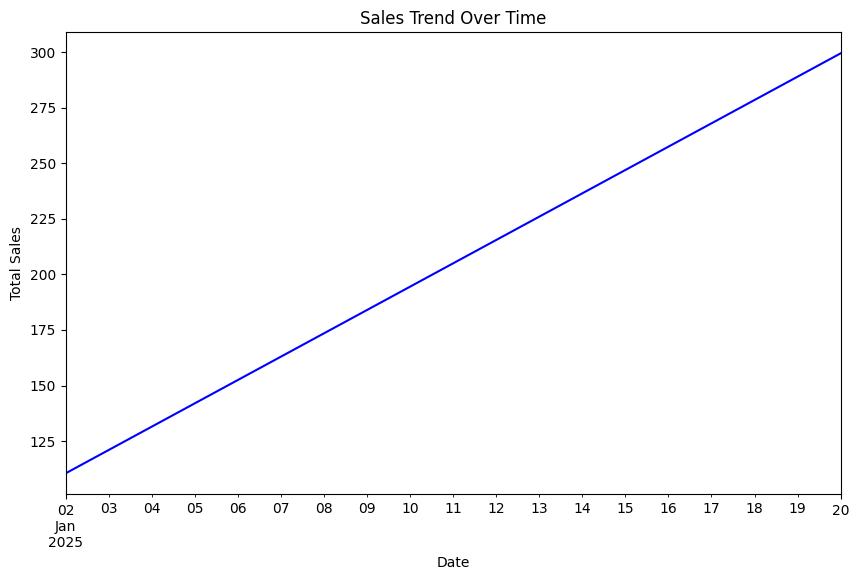

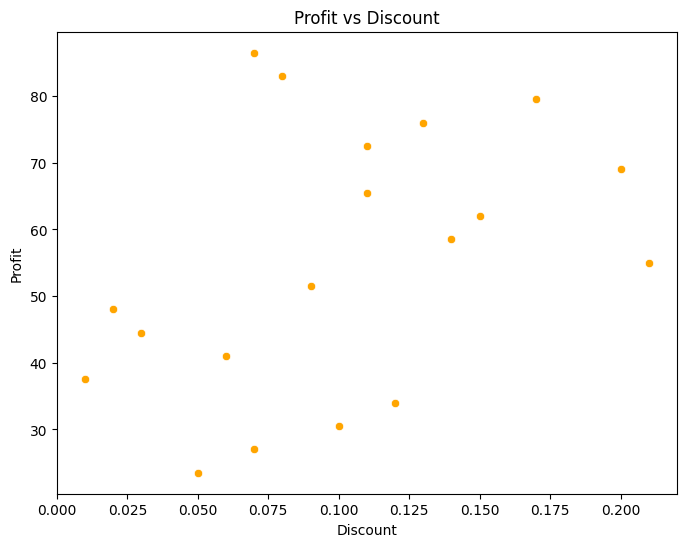

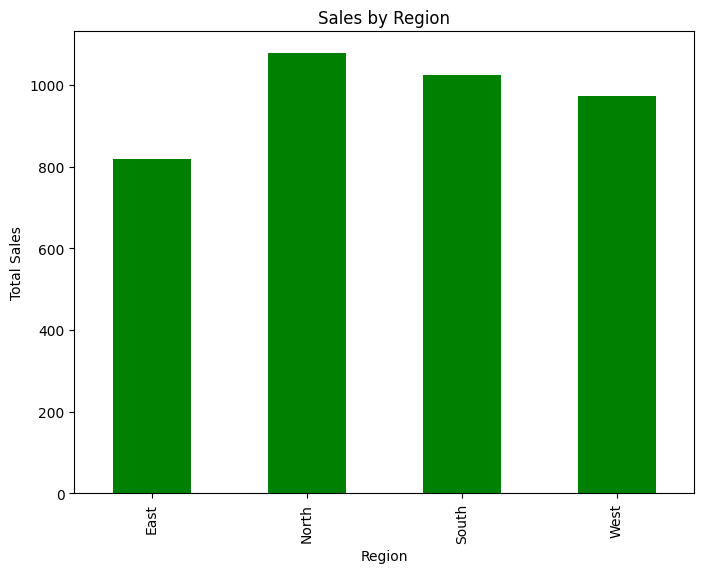

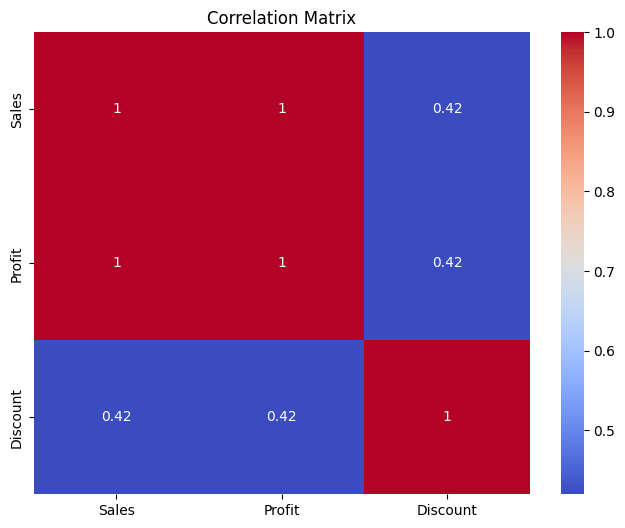

Mean Squared Error: 0.00
R-squared Score: 1.00


In [12]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('C:\\Users\\saile\\OneDrive\\Documents\\Jupyter\\global superstore.csv')

# Display the first few rows
print("First 5 rows of the dataset:")
display(df.head())

# Basic information about the dataset
print("\nDataset Information:")
df.info()

# Statistical summary of numerical columns
print("\nStatistical Summary:")
display(df.describe())

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates
df = df.drop_duplicates()

# Handle missing values
print(f"Missing values before cleaning:\n{df.isnull().sum()}")

# Fill missing numerical values with column mean
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
print(f"Missing values after cleaning:\n{df.isnull().sum()}")

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Verify the changes
print("\nData after cleaning:")
display(df.head())

# Plot sales trends over time
plt.figure(figsize=(10, 6))
df.groupby('Date')['Sales'].sum().plot(kind='line',color='blue')
plt.title('Sales Trend Over Time')
plt.xlabel('Date') 
plt.ylabel('Total Sales')
plt.show()

# Scatter plot: Profit vs Discount
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Discount',y='Profit',data=df,color='orange')
plt.title('Profit vs Discount')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

# Sales distribution by region
plt.figure(figsize=(8, 6))
region_sales = df.groupby('Region')['Sales'].sum()
region_sales.plot(kind='bar',color='green')
plt.title('Sales by Region')
plt.ylabel('Total Sales')
plt.show()

# Heatmap for correlations
plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target
X = df[['Profit','Discount']]
y = df['Sales']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train,y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Mean Squared Error: {mean_squared_error(y_test,y_pred):.2f}")
print(f"R-squared Score: {r2_score(y_test,y_pred):.2f}")